# Display the original image

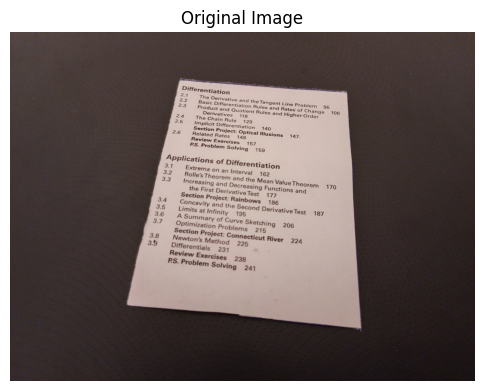

In [2]:
import os
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt


image_path = 'Original_Images/Image_1.jpeg'
image = cv2.imread(image_path)
original_image = image.copy()

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


# Border Detection

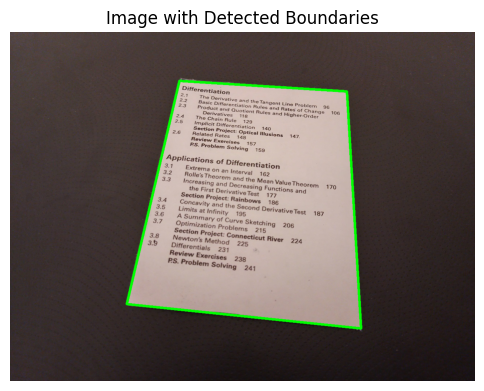

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    if len(approx) == 4:
        cv2.drawContours(original_image, [approx], -1, (0, 255, 0), 5)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Boundaries')
plt.axis('off')
plt.show()


# Perspective Transform

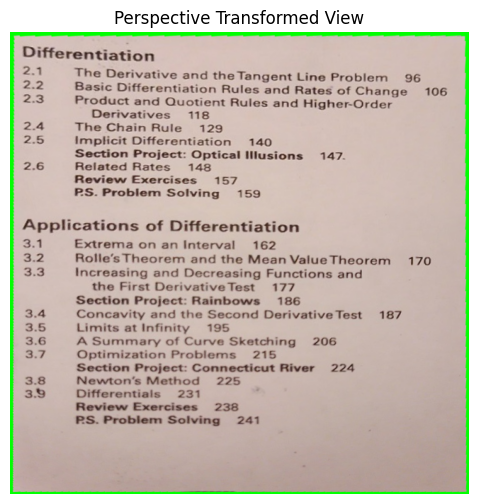

Image saved as Results_Folder/Image_1_Perspective.jpg


In [4]:
if len(approx) == 4:
    pts = approx.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]
    ], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(original_image, M, (maxWidth, maxHeight))

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
    plt.title('Perspective Transformed View')
    plt.axis('off')
    plt.show()

    results_dir = 'Results_Folder'
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(results_dir, f"{base_filename}_Perspective.jpg")
    cv2.imwrite(save_path, warped)
    print(f"Image saved as {save_path}")


# Text detection with MSER

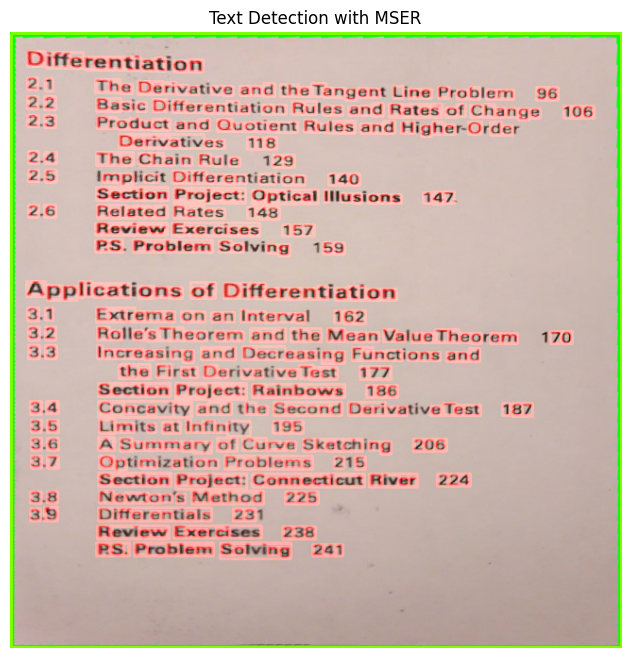

Image saved as Results_Folder/Image_1_MSER.jpg


In [5]:
mser = cv2.MSER_create()

gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

regions, _ = mser.detectRegions(gray)

mask = np.zeros_like(warped)

for region in regions:
    x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
    cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), 2)

highlighted_image = cv2.addWeighted(warped, 1, mask, 0.5, 0)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Text Detection with MSER')
plt.show()

results_dir = 'Results_Folder'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
base_filename = os.path.splitext(os.path.basename(image_path))[0]
save_path = os.path.join(results_dir, f"{base_filename}_MSER.jpg")
cv2.imwrite(save_path, highlighted_image)
print(f"Image saved as {save_path}")

# EasyOCR (CRNN-based)

In [6]:
reader = easyocr.Reader(['en'], verbose=True)

print("\nStarting text recognition...")
results = reader.readtext(highlighted_image)
print("\nText recognition completed.")

detected_text = "\n".join([result[1] for result in results])
print("\nDetected Text:\n")
print(detected_text)

results_dir = 'Results_Folder'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
base_filename = os.path.splitext(os.path.basename(image_path))[0]
text_save_path = os.path.join(results_dir, f"{base_filename}_Text.txt")

with open(text_save_path, 'w') as text_file:
    text_file.write(detected_text)
print(f"\nText saved as {text_save_path}")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Starting text recognition...

Text recognition completed.

Detected Text:

Differentiation
2.1
The Derivative and the Tangent Line Problem
96
2.2
Basic Differentiation
Rules and Rates of Change
106
2.3
Product and Quotient Rules and Higher-Order
Derivatives
118
2.4
The Chain Rule
129
2.5
Implicit Differentiation
140
Section Project:
Optical Illusions
147.
2.6
Related
Rates
148
Review Exercises
157
PS: Problem Solving
159
Applications of Differentiation
3.1
Extrema on an Interval
162
3.2
Rolle's Theorem ard the
Mean Value Theorem
170
3.3
Increasing and Decreasing Functions and
thu
First Derivative Tesi
177
Section Prolect: Rainbows
186
3.4
Concavity and the Second Derivative Test
187
3.5
Limits
a[
Infinity
195
3.6
A Summary of Curve Sketching
206
3.7
Optimization Problems
215
Section Project: connecticut River
224
3.4
Namons Method
225
3,9
Dinerentials
231
Review
Exercises
238
PS_
Problem Solving
201

Text sa